In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
happiness_test = pd.read_csv(r'G:\Data Analysis\happiness\\happiness_test_abbr.csv')
happiness_train = pd.read_csv(r'G:\Data Analysis\happiness\\happiness_train_abbr.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
happiness_train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,20000,1,45.0,176,155,3,2,5,5,2,4,3,3,3,1,3.0,30.0,1.0,2.0,60000.0,2,2,1,2,3,3,2,4,3
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,20000,1,110.0,170,110,5,4,3,1,2,4,3,3,6,1,3.0,2.0,1.0,3.0,40000.0,3,4,1,2,1,1,1,4,2
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,2000,1,120.0,160,122,4,4,5,1,3,4,2,4,5,2,NaN,NaN,NaN,NaN,8000.0,3,3,1,2,3,2,1,4,2
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,6420,1,78.0,163,170,4,4,4,1,2,4,4,4,5,4,NaN,NaN,NaN,NaN,12000.0,3,3,1,1,7,2,1,3,2
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,-1,2,70.0,165,110,5,5,3,2,4,3,4,2,1,6,NaN,NaN,NaN,NaN,-2.0,4,3,1,1,1,3,2,3,-8


In [71]:
happiness_train = happiness_train.drop(happiness_train[happiness_train['happiness']<0].index)
train_size, test_size = len(happiness_train), len(happiness_test)
y_train = happiness_train['happiness']
happiness_train = happiness_train.drop(['happiness'],axis=1)
happiness = pd.concat((happiness_train, happiness_test)).reset_index(drop=True)
happiness.shape

(10956, 41)

In [72]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 41 columns):
id                 10956 non-null int64
survey_type        10956 non-null int64
province           10956 non-null int64
city               10956 non-null int64
county             10956 non-null int64
survey_time        10956 non-null object
gender             10956 non-null int64
birth              10956 non-null int64
nationality        10956 non-null int64
religion           10956 non-null int64
religion_freq      10956 non-null int64
edu                10956 non-null int64
income             10956 non-null int64
political          10956 non-null int64
floor_area         10956 non-null float64
height_cm          10956 non-null int64
weight_jin         10956 non-null int64
health             10956 non-null int64
health_problem     10956 non-null int64
depression         10956 non-null int64
hukou              10956 non-null int64
socialize          10956 non-null int64
relax   

In [73]:
happiness['survey_time'] = pd.to_datetime(happiness['survey_time'])
happiness['survey_week'] = happiness['survey_time'].dt.week
happiness['survey_dayofweek'] = happiness['survey_time'].dt.dayofweek

In [74]:
happiness['age'] = 2015 - happiness['birth']
def people_classify(temp):
    if temp>=18 and temp<26:
        return 'young'
    if temp>=26 and temp<35:
        return 'young_middle'
    if temp>=35 and temp<50:
        return 'middle_aged'
    if temp>=50 and temp<65:
        return 'middle_eldly'
    if temp>=65:
        return 'eldly'
happiness['age_classify'] = happiness.age.apply(people_classify)
happiness['nationality'] = happiness['nationality'].apply(abs)

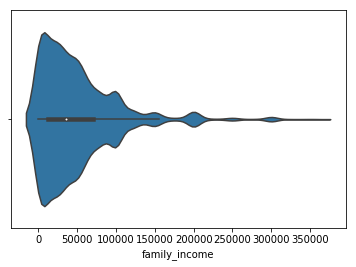

In [17]:
sns.violinplot(happiness[happiness['family_income']<400000].family_income)

In [48]:
def fix_income(temp):
    if temp<0:
        return 0
    if temp>=0 and temp<2000:
        return 1
    if temp>=2000 and temp<12000:
        return 2
    if temp>=12000 and temp>18000:
        return 3
    if temp>=18000 and temp<24000:
        return 4
    if temp>=24000 and temp<36000:
        return 5
    if temp>=36000 and temp<60000:
        return 6
    if temp>=60000 and temp<84000:
        return 7
    if temp>=84000:
        return 8
def fix_family_income(temp):
    if temp<0:
        return 0
    if temp>=0 and temp<12000:
        return 1
    if temp>=12000 and temp<24000:
        return 2
    if temp>=242000 and temp>36000:
        return 3
    if temp>=36000 and temp<60000:
        return 4
    if temp>=60000 and temp<100000:
        return 5
    if temp>=100000 and temp<160000:
        return 6
    if temp>=160000 and temp<240000:
        return 7
    if temp>=240000:
        return 8
happiness['income'] = happiness.income.apply(fix_income)
happiness['family_income'] = happiness.family_income.apply(fix_family_income)

In [77]:
happiness['work_manage'] = happiness['work_manage'].fillna('None')
happiness['work_status'] = happiness['work_status'].fillna('None')
happiness['work_type'] = happiness['work_type'].fillna('None')
happiness['work_yr'] = happiness['work_yr'].fillna('None')
happiness['family_income'] = happiness['family_income'].fillna(happiness['family_income'].mode()[0])

In [78]:
happiness.head()

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,income,political,floor_area,height_cm,weight_jin,health,health_problem,depression,hukou,socialize,relax,learn,equity,class,work_exper,work_status,work_yr,work_type,work_manage,family_income,family_m,family_status,house,car,marital,status_peer,status_3_before,view,inc_ability,survey_week,survey_dayofweek,age,age_classify
0,1,1,12,32,59,2015-08-04 14:18:00,1,1959,1,1,1,11,20000,1,45.0,176,155,3,2,5,5,2,4,3,3,3,1,3,30,1,2,60000.0,2,2,1,2,3,3,2,4,3,32,1,56,middle_eldly
1,2,2,18,52,85,2015-07-21 15:04:00,1,1992,1,1,1,12,20000,1,110.0,170,110,5,4,3,1,2,4,3,3,6,1,3,2,1,3,40000.0,3,4,1,2,1,1,1,4,2,30,1,23,young
2,3,2,29,83,126,2015-07-21 13:24:00,2,1967,1,0,3,4,2000,1,120.0,160,122,4,4,5,1,3,4,2,4,5,2,None,None,None,None,8000.0,3,3,1,2,3,2,1,4,2,30,1,48,middle_aged
3,4,2,10,28,51,2015-07-25 17:33:00,2,1943,1,1,1,3,6420,1,78.0,163,170,4,4,4,1,2,4,4,4,5,4,None,None,None,None,12000.0,3,3,1,1,7,2,1,3,2,30,5,72,eldly
4,5,1,7,18,36,2015-08-10 09:50:00,2,1994,1,1,1,12,0,2,70.0,165,110,5,5,3,2,4,3,4,2,1,6,None,None,None,None,0.0,4,3,1,1,1,3,2,3,-8,33,0,21,young


In [79]:
happiness = happiness.drop(['id', 'survey_time','birth','age'],axis=1)

In [80]:
happiness = pd.get_dummies(happiness)
happiness.shape

(10956, 119)

In [81]:
train = happiness.iloc[:train_size]
test = happiness.iloc[train_size:]

In [82]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    return rmse
model_xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
       colsample_bytree=0.971, gamma=0.11, learning_rate=0.069, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=-1, nthread=50, objective='reg:linear', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1.0)
model_xgb.fit(train, y_train)
xgb_pred = model_xgb.predict(test)
sub = pd.DataFrame()
sub['id'] = happiness_test['id']
sub['happiness'] = xgb_pred
sub.to_csv('G:\Data Analysis\happiness\submission_xgb.csv', index=False)
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=500,max_depth=7,bootstrap=True,max_features='sqrt')
# rf.fit(train, y_train)
# pred = rf.predict(test)
# output=pd.DataFrame({'id':happiness_test['id'],'happiness':pred})
# output.to_csv('G:\Data Analysis\happiness\submission.csv', index=False)

In [26]:
sub['happiness'] = sub['happiness'].apply(round)
sub.to_csv('G:\Data Analysis\happiness\submission.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
happiness_test = pd.read_csv(r'G:\Data Analysis\happiness\\happiness_test_abbr.csv')
happiness_train = pd.read_csv(r'G:\Data Analysis\happiness\\happiness_train_abbr.csv')
happiness_train = happiness_train.sample(frac=1,replace=False,random_state=11)
happiness_train = happiness_train.reset_index(drop=True)
happiness_train = happiness_train[happiness_train["happiness"]>0]
Y = happiness_train["happiness"]

def fix_income(temp):
    if temp<0:
        return 0
    else:
        return temp
happiness_train['family_income'] = happiness_train['family_income'].fillna(happiness_train['family_income'].mode()[0])
happiness_test['family_income'] = happiness_test['family_income'].fillna(happiness_test['family_income'].mode()[0])
happiness_train['income'] = happiness_train.income.apply(fix_income)
happiness_train['family_income'] = happiness_train.family_income.apply(fix_income)
happiness_test['income'] = happiness_test.income.apply(fix_income)
happiness_test['family_income'] = happiness_test.family_income.apply(fix_income)

happiness_train['age'] = 2015 - happiness_train['birth']
happiness_test['age'] = 2015 - happiness_test['birth']
def people_classify(temp):
    if temp>=18 and temp<26:
        return 0
    if temp>=26 and temp<35:
        return 1
    if temp>=35 and temp<50:
        return 2
    if temp>=50 and temp<65:
        return 3
    if temp>=65:
        return 4
happiness_train['age_classify'] = happiness_train.age.apply(people_classify)
happiness_test['age_classify'] = happiness_test.age.apply(people_classify)

happiness_train['survey_time'] = pd.to_datetime(happiness_train['survey_time'])
happiness_train['survey_week'] = happiness_train['survey_time'].dt.week
happiness_train['survey_dayofweek'] = happiness_train['survey_time'].dt.dayofweek

happiness_test['survey_time'] = pd.to_datetime(happiness_test['survey_time'])
happiness_test['survey_week'] = happiness_test['survey_time'].dt.week
happiness_test['survey_dayofweek'] = happiness_test['survey_time'].dt.dayofweek

def fix_weight(feature):
    sex, height, weight = feature[0], feature[1], feature[2]
    if sex == 1 and int(height)>2*int(weight):
        return 2*weight
    elif sex == 2 and int(height)>2.5*int(weight):
        return 2*weight
    else:
        return weight
happiness.weight_jin = happiness[['gender', 'height_cm', 'weight_jin']].apply(fix_weight, axis=1)

X = happiness_train.drop(columns=['id','happiness','survey_time'])
X_pred = happiness_test.drop(['id', 'survey_time'],axis=1)

from sklearn.model_selection import train_test_split
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
kfold = KFold(n_splits=15, shuffle = True, random_state= 42)
lgb_model = LGBMRegressor(n_jobs=-1,
                          learning_rate=0.05,
                          n_estimators=400,
                          max_depth=6,
                          num_leaves=50,
                          reg_alpha=2.0,
                          reg_lambda=2.1,
                          min_child_samples=30,
                          min_split_gain=0.5,
                          colsample_bytree=0.2)
# mse = []
for train, test in kfold.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    lgb_model.fit(X_train,y_train)
    y_pred = lgb_model.predict(X=X_test)
    e = mean_squared_error(y_true=y_test,y_pred=y_pred)
#     mse.append(e)
    print(e)
# print("lightgbm",np.mean(mse),mse)
lgb_pred = lgb_model.predict(X_pred)
sub2 = pd.DataFrame()
sub2['id'] = sub['id']
sub2['happiness'] = lgb_pred
sub2.to_csv('G:\Data Analysis\happiness\submission_lgb.csv', index=False)

NameError: name 'happiness' is not defined

In [3]:
import pandas as pd
import numpy as np
happiness_test = pd.read_csv(r'G:\Data Analysis\happiness\\happiness_test_complete.csv')
happiness_train = pd.read_csv(r'G:\Data Analysis\happiness\\happiness_train_complete.csv')
happiness_train.shape

(8000, 140)

In [4]:
happiness_train = happiness_train.sample(frac=1,replace=False,random_state=11)
happiness_train = happiness_train.reset_index(drop=True)
happiness_train = happiness_train[happiness_train["happiness"]>0]

happiness_train['survey_time'] = pd.to_datetime(happiness_train['survey_time'])
happiness_train['survey_week'] = happiness_train['survey_time'].dt.week
happiness_train['survey_dayofweek'] = happiness_train['survey_time'].dt.dayofweek
happiness_test['survey_time'] = pd.to_datetime(happiness_test['survey_time'])
happiness_test['survey_week'] = happiness_test['survey_time'].dt.week
happiness_test['survey_dayofweek'] = happiness_test['survey_time'].dt.dayofweek

happiness_train['age'] = 2015 - happiness_train['birth']
happiness_test['age'] = 2015 - happiness_test['birth']
def people_classify(temp):
    if temp>=18 and temp<26:
        return 0
    if temp>=26 and temp<35:
        return 1
    if temp>=35 and temp<50:
        return 2
    if temp>=50 and temp<65:
        return 3
    if temp>=65:
        return 4
happiness_train['age'] = happiness_train.age.apply(people_classify)
happiness_test['age'] = happiness_test.age.apply(people_classify)

def fix_edu_yr(temp):
    if temp<=0:
        return 0
    if temp>0 and temp<1980:
        return 1
    if temp>=1980 and temp<1990:
        return 2
    if temp>=1990 and temp<2000:
        return 3
    if temp>=2000 and temp<2010:
        return 4
    else:
        return 5
happiness_train['edu_yr'] = happiness_train.edu_yr.apply(fix_edu_yr)
happiness_test['edu_yr'] = happiness_test.edu_yr.apply(fix_edu_yr)


def fix_income(temp):
    if temp<0:
        return 0
    else:
        return temp
happiness_train['family_income'] = happiness_train['family_income'].fillna(happiness_train['family_income'].mode()[0])
happiness_test['family_income'] = happiness_test['family_income'].fillna(happiness_test['family_income'].mode()[0])
happiness_train['income'] = happiness_train.income.apply(fix_income)
happiness_train['family_income'] = happiness_train.family_income.apply(fix_income)
happiness_test['income'] = happiness_test.income.apply(fix_income)
happiness_test['family_income'] = happiness_test.family_income.apply(fix_income)
happiness_train['s_income'] = happiness_train.s_income.apply(fix_income)
happiness_test['s_income'] = happiness_test.s_income.apply(fix_income)

happiness_train['house'] = happiness_train.house.apply(fix_income)
happiness_test['house'] = happiness_test.house.apply(fix_income)

def fix_weight(features):
    sex, height, weight = features[0], features[1], features[2]
    if sex == 1 and int(height)>2*int(weight):
        return 2*weight
    elif sex == 2 and int(height)>2.5*int(weight):
        return 2*weight
    else:
        return weight
happiness_train.weight_jin = happiness_train[['gender', 'height_cm', 'weight_jin']].apply(fix_weight, axis=1)
happiness_test.weight_jin = happiness_test[['gender', 'height_cm', 'weight_jin']].apply(fix_weight, axis=1)

def fix_family_m(temp):
    if temp<0:
        return 1
    else:
        return temp
happiness_train['family_m'] = happiness_train.family_m.apply(fix_family_m)
happiness_test['family_m'] = happiness_test.family_m.apply(fix_family_m)

happiness_train = happiness_train.drop(['survey_time', 'age','edu_other', 'join_party', 'property_other','invest_other'], axis=1)
happiness_test = happiness_test.drop(['survey_time', 'age','edu_other', 'join_party', 'property_other','invest_other'], axis=1)

columns = ['edu_status', 'social_neighbor', 'social_friend', 'work_status', 
           'work_yr', 'work_type', 'work_manage','minor_child','marital_1st',
           's_birth','marital_now','s_edu','s_political','s_hukou','s_work_exper','s_work_type','s_work_status']
for i in columns:
    happiness_train[i] = happiness_train[i].fillna(-8)
    happiness_test[i] = happiness_test[i].fillna(-8)

In [11]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
cv_params = {'min_child_samples':[10,20,30,40],
            'min_split_gain':[0.3,0.5,0.7],
            'colsample_bytree':[0.2,0.4,0.6,0.8]}
lgb_cv_model = LGBMRegressor(n_jobs=-1,
                          learning_rate=0.02,
                          n_estimators=400,
                          max_depth=6,
                          num_leaves=50,
                          reg_alpha=1, 
                          reg_lambda=0.01,
                          min_child_samples=30,
                          min_split_gain=0.5,
                          colsample_bytree=0.2)
gs = GridSearchCV(lgb_cv_model,cv_params,scoring='r2',cv=4,verbose=1)
gs_result = gs.fit(X_train,y_train)
gs_result.best_params_

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:  2.5min finished


{'colsample_bytree': 0.6, 'min_child_samples': 10, 'min_split_gain': 0.5}

In [6]:
Y = happiness_train['happiness']
X = happiness_train.drop(columns=['id','happiness'])
sub = pd.DataFrame()
sub['id'] = happiness_test['id']
X_pred = happiness_test.drop(['id'],axis=1)

from sklearn.model_selection import train_test_split
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
kfold = KFold(n_splits=15, shuffle = True, random_state= 12)
lgb_model = LGBMRegressor(n_jobs=-1,
                          learning_rate=0.02,
                          n_estimators=400,
                          max_depth=6,
                          num_leaves=50,
                          reg_alpha=1, 
                          reg_lambda=0.01,
                          min_child_samples=10,
                          min_split_gain=0.5,
                          colsample_bytree=0.6)
# mse = []
for train, test in kfold.split(X):
    X_train = X.iloc[train]
    y_train = Y.iloc[train]
    X_test = X.iloc[test]
    y_test = Y.iloc[test]
    lgb_model.fit(X_train,y_train)
    y_pred = lgb_model.predict(X=X_test)
    e = mean_squared_error(y_true=y_test,y_pred=y_pred)
#     mse.append(e)
    print(e)
# print("lightgbm",np.mean(mse),mse)
lgb_pred = lgb_model.predict(X_pred)
sub['happiness'] = lgb_pred
sub.to_csv('G:\Data Analysis\happiness\submission_lgb3.csv', index=False)

0.5221414701503081
0.4481983724631839
0.394095257261555
0.4635959329917717
0.4246852512934253
0.41216223894523624
0.49082313595421895
0.4901862401946435
0.4444660074691508
0.48132838469924155
0.4379761552960885
0.4936635287523596
0.45368411551523324
0.46653924754276177
0.4181915881459801
